## Import data analysis packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Get the data

In [2]:
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Explore and clean the data

In [3]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Remove irrelevant columns
titanic.drop(["Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


In [5]:
# titanic.drop(titanic["Cabin"].isna(), inplace=True)
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [6]:
titanic.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.000000,1,0,S
1,2,1,1,female,38.000000,1,0,C
2,3,1,3,female,26.000000,0,0,S
3,4,1,1,female,35.000000,1,0,S
4,5,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,S
887,888,1,1,female,19.000000,0,0,S
888,889,0,3,female,29.699118,1,2,S
889,890,1,1,male,26.000000,0,0,C


In [7]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [8]:
titanic.dropna(inplace=True)

In [9]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [10]:
# Drop Unnescessary columns
titanic.drop("PassengerId", axis=1, inplace=True)

### Get Info

In [11]:
len(titanic[titanic["Sex"] == "male"])

577

In [12]:
len(titanic[titanic["Sex"] == "female"])

312

In [13]:
len(titanic)

889

In [14]:
577 + 312

889

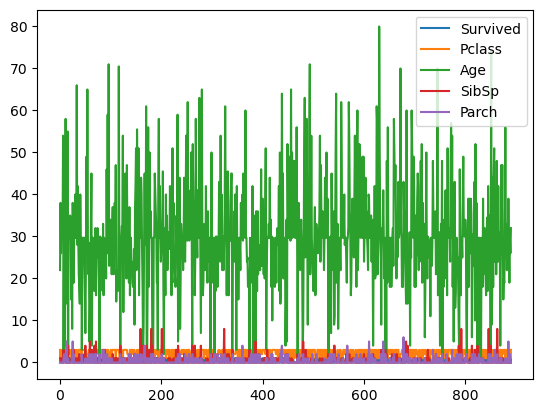

In [15]:
titanic.plot();

<Axes: xlabel='Sex'>

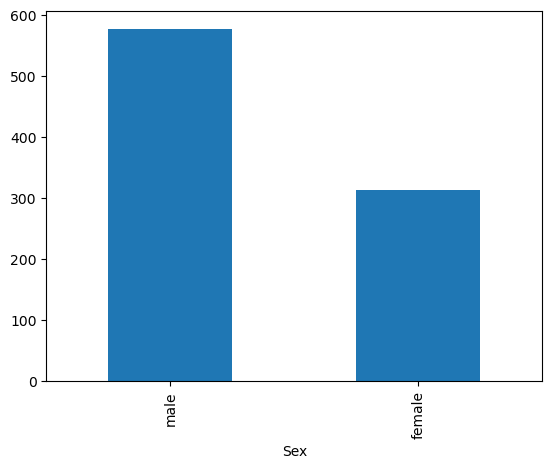

In [125]:
titanic["Sex"].value_counts().plot(kind="bar")

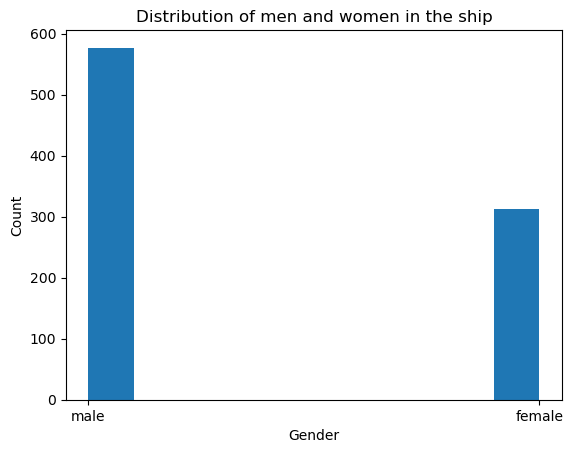

In [16]:
fig, ax = plt.subplots()
ax.hist(titanic["Sex"]);
ax.set_xlabel("Gender");
ax.set_ylabel("Count");
ax.set_title("Distribution of men and women in the ship");
# This implies that men were more than women

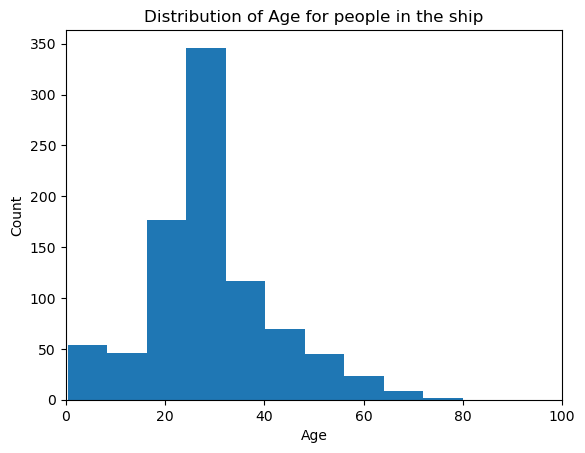

In [17]:
fig, ax = plt.subplots()
ax.hist(titanic["Age"]);
ax.set_xlabel("Age");
ax.set_ylabel("Count");
ax.set_xlim([0, 100])
ax.set_title("Distribution of Age for people in the ship");
# This implies that the highest age range is btn 25 to 35

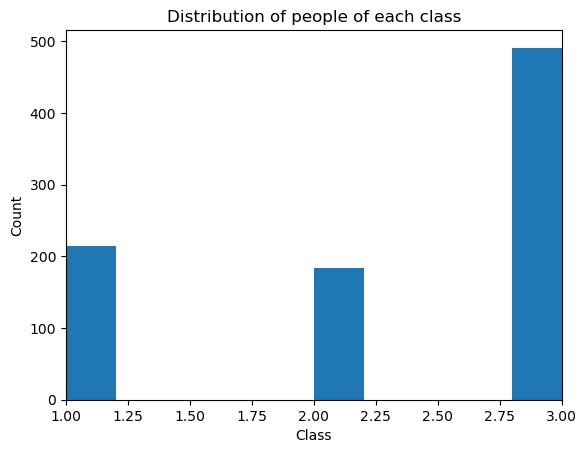

In [18]:
fig, ax = plt.subplots()
ax.hist(titanic["Pclass"]);
# ax.set_ylim([-2, 2])
ax.set_xlabel("Class");
ax.set_ylabel("Count");
ax.set_xlim([1, 3])
ax.set_title("Distribution of people of each class");
# This implies that majority were in the third class, followed by first then second

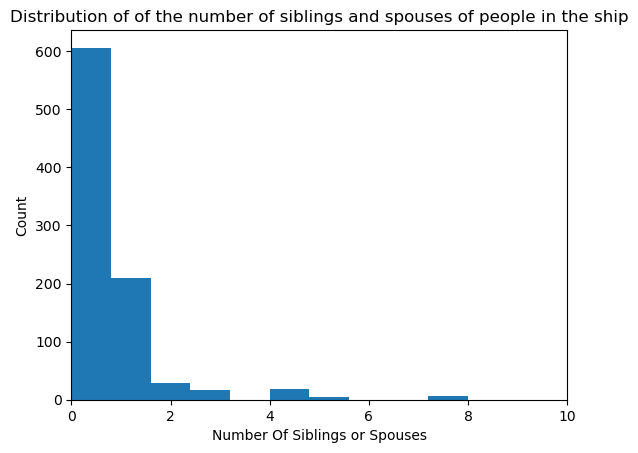

In [19]:
fig, ax = plt.subplots()
ax.hist(titanic["SibSp"]);
ax.set_xlabel("Number Of Siblings or Spouses");
ax.set_ylabel("Count");
ax.set_xlim([0, 10])
ax.set_title("Distribution of of the number of siblings and spouses of people in the ship");
# This implies that majority did not have siblings or spouses

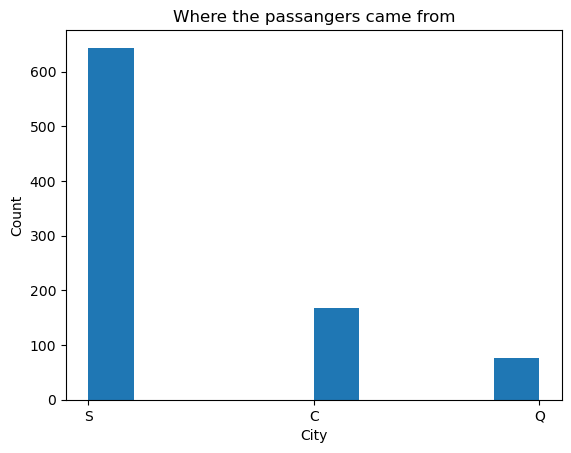

In [24]:
fig, ax = plt.subplots()
ax.hist(titanic["Embarked"]);
ax.set_xlabel("City");
ax.set_ylabel("Count");
# ax.legend(labels=["S", "C", "Q"], handles=["Southampton", "Cherboug", "Quennstown"], title="City")
ax.set_title("Where the passangers came from");
# This implies that majority came from southampton

In [27]:
titanic_town = titanic.groupby("Embarked")
titanic_town["Survived"].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

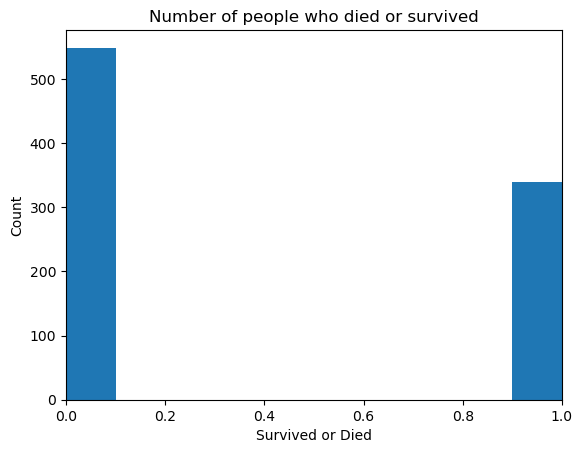

In [82]:
fig, ax = plt.subplots()
ax.set_xlabel("Survived or Died");
ax.set_ylabel("Count");
ax.set_title("Number of people who died or survived");
ax.hist(titanic["Survived"]);
ax.set_xlim([0, 1]);
# majority died

In [73]:
titanic_gender = titanic.drop(["Parch", "Embarked", "SibSp", "Pclass", "Age"], axis=1)

In [74]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [75]:
titanic_gender

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


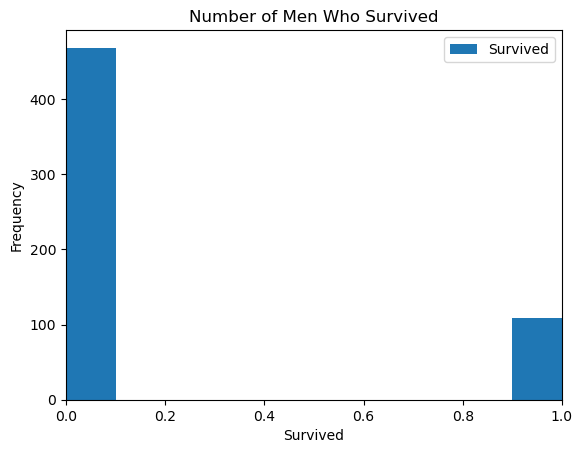

In [83]:
titanic_gender[titanic["Sex"] == "male"].plot(kind="hist")
plt.title("Number of Men Who Survived")
plt.xlabel("Survived")
plt.xlim([0, 1])
plt.show()

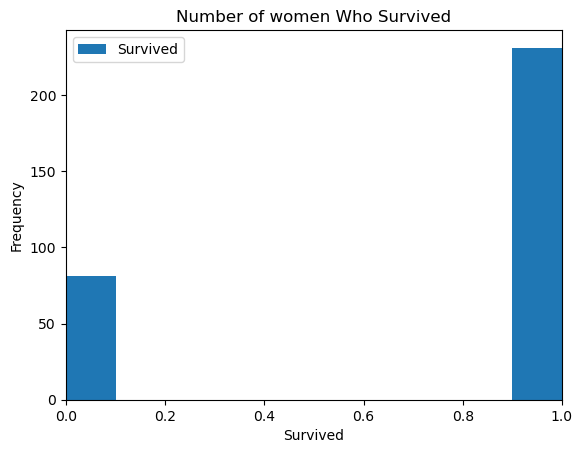

In [84]:
titanic_gender[titanic["Sex"] == "female"].plot(kind="hist")
plt.title("Number of women Who Survived")
plt.xlabel("Survived")
plt.xlim([0, 1])
plt.show()

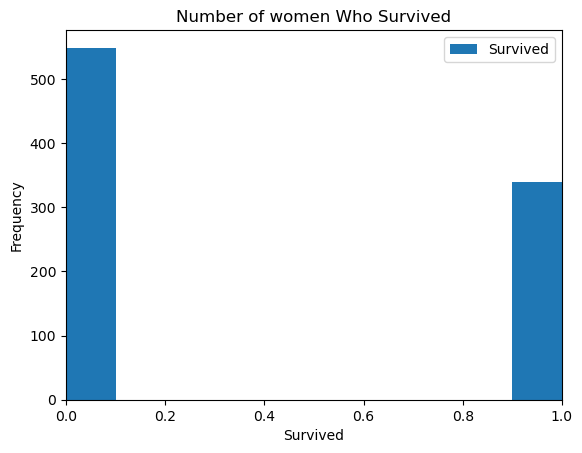

In [87]:
titanic_class = titanic.drop(["Parch", "Embarked", "SibSp", "Sex", "Age"], axis=1)
titanic_class.plot("Pclass", kind="hist")
plt.title("Number of women Who Survived")
plt.xlabel("Survived")
plt.xlim([0, 1])
plt.show()

In [96]:
titanic_class[titanic_class["Pclass"] == 1].value_counts()

Survived  Pclass
1         1         134
0         1          80
Name: count, dtype: int64

In [109]:
len(titanic)

889

In [111]:
titanic.drop("Person", axis=1, inplace=True)

In [112]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


### Train The model

In [114]:
# Getting Data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Set up random seed
import numpy as np
np.random.seed(42)

#Set categories
categories = ["Sex"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categories),
    ]
)

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier())
])


# Split data
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and Score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.797752808988764

In [115]:
# Use GridSearchCV with our regression Pipeline
pipe_grid = {
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [10],
    "model__min_samples_split": [2, 4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=1000; total time=   8.6s
[CV] END model__max_depth=None, model__max_features=10, model__min_samples_split=2, model__n_estimators=1000; total time=   9.4s
[CV] END model__max_depth=None, model__max

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [10],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000]},
             verbose=2)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluation function
def evaluate_preds(y_true, y_preds):
    """Perfoms an evaluation comparison on y_true labels vs y_pred lables on classification model"""
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict  

In [119]:
preds = gs_model.predict(X_test)
evaluate_preds(y_test, preds)

Acc: 79.78%
Precision: 0.73
Recall: 0.77
F1: 0.75


{'accuracy': 0.8, 'precision': 0.73, 'recall': 0.77, 'f1': 0.75}

In [121]:
preds = model.predict(X_test)
evaluate_preds(y_test, preds)

Acc: 79.78%
Precision: 0.73
Recall: 0.77
F1: 0.75


{'accuracy': 0.8, 'precision': 0.73, 'recall': 0.77, 'f1': 0.75}